# Introduction to Chaos & Dynamical Systems 

In [1]:
import numpy as np

from bokeh import palettes
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt

## 1. One-Dimensional Maps 

### Logistic Map

In [44]:
def g(a, x, n):
    v = a * x * (1 - x)
    if n == 1:
        return v
    else:
        return g(a, v, n-1)

In [45]:
def make_cobweb(func, x0):
    x = np.linspace(0, 1, 100)
    y = x
    y2 = func(x)

    sinks = []
    aux = []

    f, ax = plt.subplots(figsize=(15, 3))

    ax.plot(x, y, color='k', lw=1, label=r'$y=x$', zorder=1, alpha=.7)
    ax.plot(x, y2, lw=2, label=r'$g(x)$', zorder=1, alpha=.7)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    ax.set_title('Cobweb Plot | x0 = {}'.format(x0), fontsize=14)

    for n in range(N):

        ax.scatter(x0, x0, color='k', s=12, zorder=2)
        ax.scatter(x0, func(x0), color='k', s=12, zorder=2)
        ax.axvline(x0, ymin=x0/ax.get_ylim()[1], ymax=func(x0)/ax.get_ylim()[1], lw=1, ls='--', c='b')
        ax.axhline(func(x0), xmin=x0/ax.get_xlim()[1], xmax=func(x0)/ax.get_xlim()[1], lw=1, ls='--', c='b')

        aux.append(round(x0, 4))
        x0 = func(x0)
        if round(x0, 4) in aux:
            sinks.append(round(x0, 4))

    sinks = list(set(sinks))

    [ax.axvline(sink, ls='--', lw=1, color='r') for sink in sinks]

    ax.set_xticks(np.arange(0, 1.1, .1))
    ax.legend(loc='upper left', ncol=2, fontsize=14)
    plt.show()
    return sinks

In [46]:
def make_map(sinks):
    f, ax = plt.subplots(figsize=(15, 3))

    for x0 in x0s:
        Ns = range(1, N+1)
        xs = [g(a, x0, n) for n in Ns]
        color = cm.viridis(x0 / .51, 1)
        plt.plot(Ns, xs, color=color, label=round(x0, 2))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(1, N)
    ax.set_yticks(np.arange(0, 1.1, .1))

    ax.set_ylabel(r'$g^k(x)$', fontsize=14)
    ax.set_xlabel('k', fontsize=14)

    ax.legend(title=r'$x_0$', ncol=3, bbox_to_anchor=(1.03, 1))

    ax.set_title('Logistic Growth: ' + r'$g^{k+1}(x) = \alpha g^{k}(1-g^{k}(x_0))$', fontsize=14)

    [ax.axhline(sink, ls='--', lw=2, color='r') for sink in sinks]

    plt.xticks(range(1, N+1))
    plt.show()

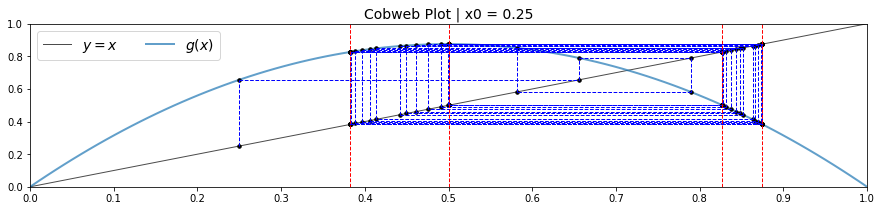

Sinks: [0.875, 0.8269, 0.5009, 0.3828]


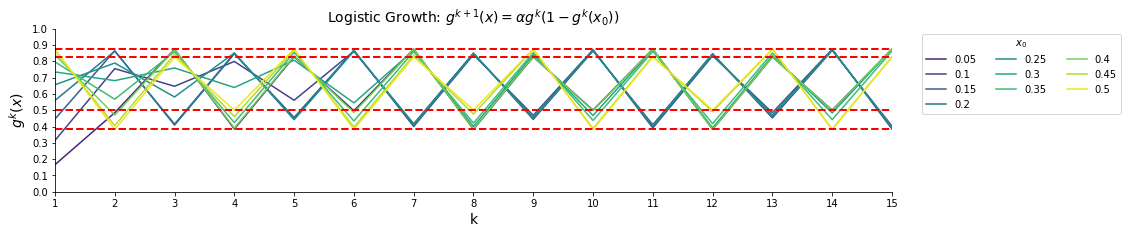

In [58]:
x0 = .25
N = 50
a = 3.5
func = lambda x: a * x * (1 - x)
sinks = make_cobweb(func, x0)
print('Sinks:', sinks)
x0s = list(np.arange(start=.0, stop=.51, step=.05))[1:]
N = 15
make_map(sinks)

### Cobweb Plot

#### Logistic Map

#### Sensibility to Initial Conditions 

In [7]:
x0 = .25
N = 100
a = 3.98
func = lambda x: 3 * x % 1

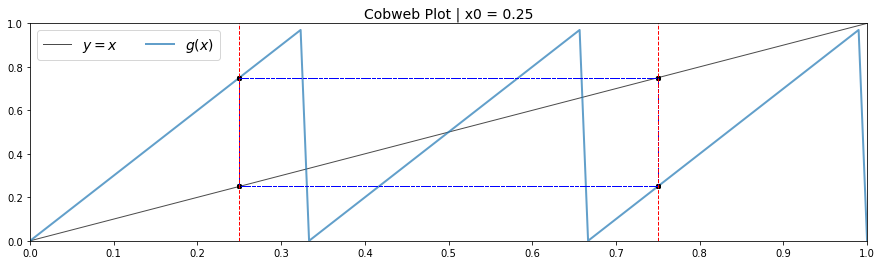

Sinks: [0.25, 0.75]


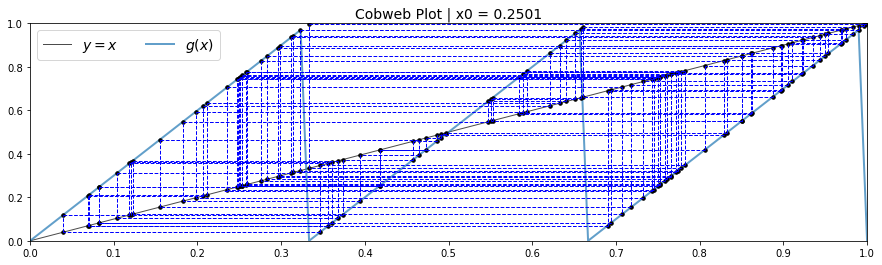

Sinks: []


In [8]:
make_cobweb(func, x0)
make_cobweb(func, x0 + 0.0001)

## N-Dimensional Maps 

### Henon Map 

In [60]:
def make_henon(a, b, x0, y0, N):

    f = lambda x, y: (a - x ** 2 + b * y, x)

    x, y = (y0, y0)
    xs, ys = [x], [y]

    for n in range(N):
        x, y = f(x, y)
        xs.append(x)
        ys.append(y)

    return xs, ys

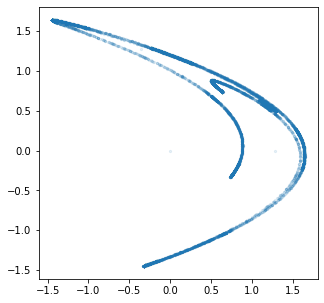

In [87]:
alpha = 1.28
beta = .3
N = 10000
x0, y0 = 0, 0

xs, ys = make_henon(a=alpha, b=beta, x0=x0, y0=y0, N=N)

f, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xs, ys, alpha=.1, s=5)

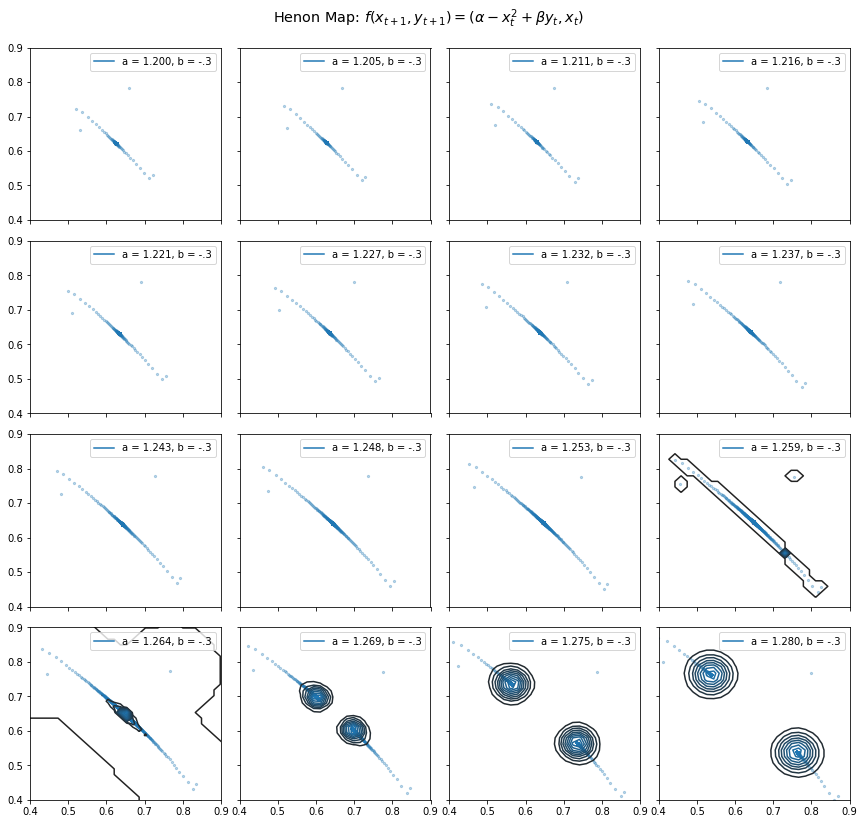

In [104]:
beta = -0.3
x0, y0 = 0, 0
N = 1000
fig, axs = plt.subplots(4, 4, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()

alphas = np.linspace(1.2, 1.28, 16)

for alpha, ax in zip(alphas, axs):
    xs, ys = make_henon(a=alpha, b=beta, x0=x0, y0=y0, N=N)
    ax.scatter(xs, ys, alpha=.3, s=5)
    sns.kdeplot(xs, ys, label='a = {:.3f}, b = -.3'.format(alpha), ax=ax)

    ax.legend()
    ax.set_xlim(.4, .9)
    ax.set_ylim(.4, .9)
    
fig.suptitle('Henon Map: ' + r'$f(x_{t+1}, y_{t+1}) = (\alpha - x_{t}^2 + \beta y_t, x_t)$', fontsize='x-large')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('henon_map.png')